# SEC-DIP--Coin-Detection-using-OpenCV-in-Python #
# Name: K Charan Teja #
# Reg No: 212224040163 #

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

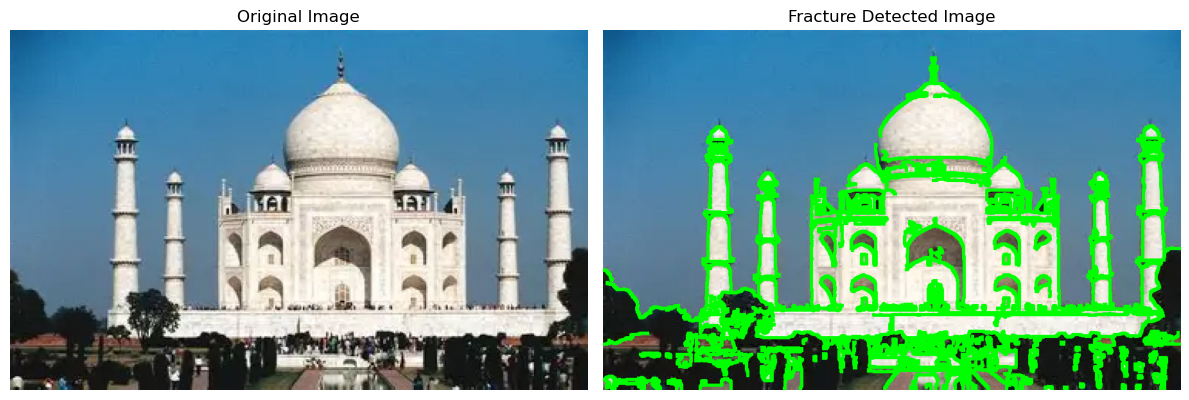

Saved overlay image to: taj_edges_overlay.png


In [12]:
def detect_and_overlay_edges(image_path,
                             resize_width=None,
                             canny_thresh1=50,
                             canny_thresh2=150,
                             blur_ksize=(5,5),
                             dilate_iter=2,
                             edge_color=(0, 255, 0),   # BGR green
                             alpha=1.0,
                             save_path=None):
    
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        raise FileNotFoundError(f"Cannot load image: {image_path}")

    # 2) Optional resize (keeps aspect ratio)
    if resize_width is not None:
        h, w = img_bgr.shape[:2]
        scale = resize_width / float(w)
        new_h = int(h * scale)
        img_bgr = cv2.resize(img_bgr, (resize_width, new_h), interpolation=cv2.INTER_AREA)

    # 3) Preprocess: blur to reduce noise
    blurred = cv2.GaussianBlur(img_bgr, blur_ksize, 0)

    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, canny_thresh1, canny_thresh2)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    edges_dilated = cv2.dilate(edges, kernel, iterations=dilate_iter)

    edges_clean = edges_dilated

    mask_colored = np.zeros_like(img_bgr)
    mask_colored[edges_clean != 0] = edge_color  

    overlay = img_bgr.copy()
    overlay[edges_clean != 0] = mask_colored[edges_clean != 0]
 

    original_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

    if save_path:
        cv2.imwrite(save_path, overlay)

    return original_rgb, overlay_rgb

# === USAGE ===
if __name__ == "__main__":
    img_path = "taj.jpg"   
    out_save = "taj_edges_overlay.png"

    original_rgb, overlay_rgb = detect_and_overlay_edges(
        image_path = img_path,
        resize_width = 900,         
        canny_thresh1 = 50,
        canny_thresh2 = 180,
        blur_ksize = (5,5),
        dilate_iter = 2,
        edge_color = (0, 255, 0),   
        alpha = 1.0,
        save_path = out_save
    )

    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(original_rgb)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title("Fracture Detected Image")
    plt.imshow(overlay_rgb)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Saved overlay image to: {out_save}")
